# Imdb Movie Review Data Preprocessing


The project utilizes a public dataset of movie reviews from Kaggle. The data is loaded and preprocessed before being used for training the models.
#### Data Cleaning and Preprocessing
* Reviews are converted to lowercase.
* HTML tags and URLs are removed.
* Stop words (common words with little semantic meaning) are eliminated.
* Text is normalized by removing punctuation and special characters.
* data distribution
* save cleaned data into a csv file

In [2]:
# Loading necessary library
import numpy as np
import pandas as pd

# visualization
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

#NLP libraries
import nltk
from nltk.corpus import stopwords

In [3]:
df=pd.read_csv("sample_data/IMDBDataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Cleaning and Preprocessing

In [4]:
# changing positive and negative into numeric values

def cat2num(value):
    if value=='positive':
        return 1
    else:
        return 0

df['sentiment']  =  df['sentiment'].apply(cat2num)

In [5]:
# Lowercase
df['review'].str.lower()

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [6]:
# remove Html tags
import re
def remove_html_tags(reviews):
    return re.sub(r'<[^<]+?>', '', reviews)

df['review'] = df['review'].apply(remove_html_tags)

In [7]:
# remove URLs
def remove_url(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)
df['review'] = df['review'].apply(remove_url)

In [8]:
# Text preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['review']= df['review'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)
#df_transformed['review_body'] = df_transformed['review_body'].str.replace('[^\\w\\s]', '', regex=True)
df['review'] = df['review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df['review']=df['review'].str.lower()
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [9]:
df['review'][1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

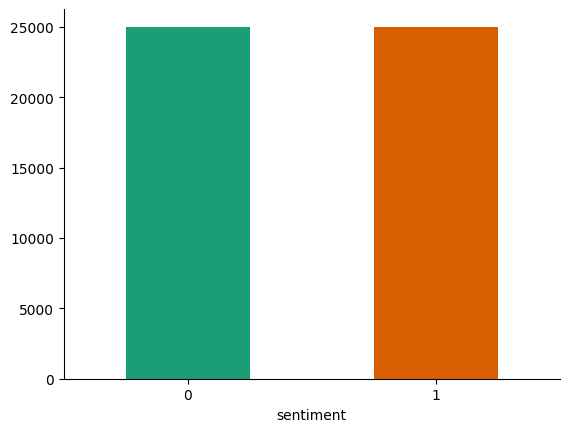

In [10]:
# sns.countplot(data=new_df, x='sentiment')
df.groupby(['sentiment']).size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'), rot=0)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [11]:
#Pie chart
values = df["sentiment"].value_counts()
labels = df["sentiment"].unique().tolist()
cdict = {'Positive': '#79DE79', 'Negative': '#FB6962', 'Neutral': '#A8E4EF'}

fig = px.pie(values=values, names=labels, color=labels, title='Sentiment reviews', color_discrete_map=cdict, width=600, height=400)
fig.update_traces(textposition='inside', textinfo='percent+label', insidetextorientation='radial', hovertemplate = "Number of reviews: %{value}")

fig.show()

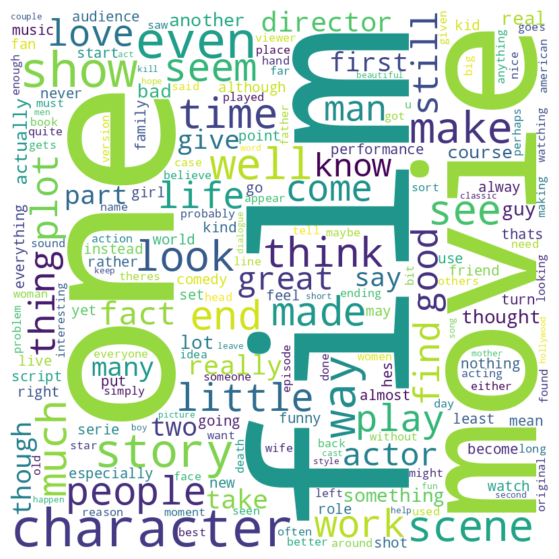

In [12]:
from wordcloud import WordCloud
from collections import Counter
# Extract high-frequency words
# Combine all reviews into a single string
all_reviews = " ".join(df["review"])

# Visualize it using wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_reviews)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.show()

In [13]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [15]:
df_transformed=df.copy()
df_transformed.to_csv('./data/data_transformed_imdb.csv', index=False)